In [70]:
import sagemaker
from sagemaker import get_execution_role

sagemaker_session = sagemaker.Session()

# Get a SageMaker-compatible role used by this Notebook Instance.
role = get_execution_role()

In [71]:
import boto3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
bucket='sagemaker12'
data_key = 'forecast/Building_Dummy_New_car&parts_sales_by_model.xlsx'
data_location = 's3://{}/{}'.format(bucket, data_key)
df=pd.read_excel(data_location)


In [73]:
df['Date']=pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [74]:
df.head()

,Year,Month,Make,Model,Door_Handles_Sold,Tires_Sold,Brake_Hydraulic_Hose_Sold,Air_Suspension_Sold,Window_Regulators_Sold,Date
0,2007,1,Volkswagen,Volkswagen Passat,1267,276,392,547,187,2007-01-01
1,2007,2,Volkswagen,Volkswagen Passat,602,258,326,333,118,2007-02-01
2,2007,3,Volkswagen,Volkswagen Passat,521,268,338,544,177,2007-03-01
3,2007,3,Toyota,Toyota Avensis,521,259,321,767,149,2007-03-01
4,2007,3,Volkswagen,Volkswagen Golf,402,226,247,343,644,2007-03-01


In [75]:
da=df.drop(['Year','Month'],axis=1)

In [76]:
da.set_index(da['Date'], inplace=True) 

In [77]:
df=da.drop(['Date','Make','Model'],axis=1)

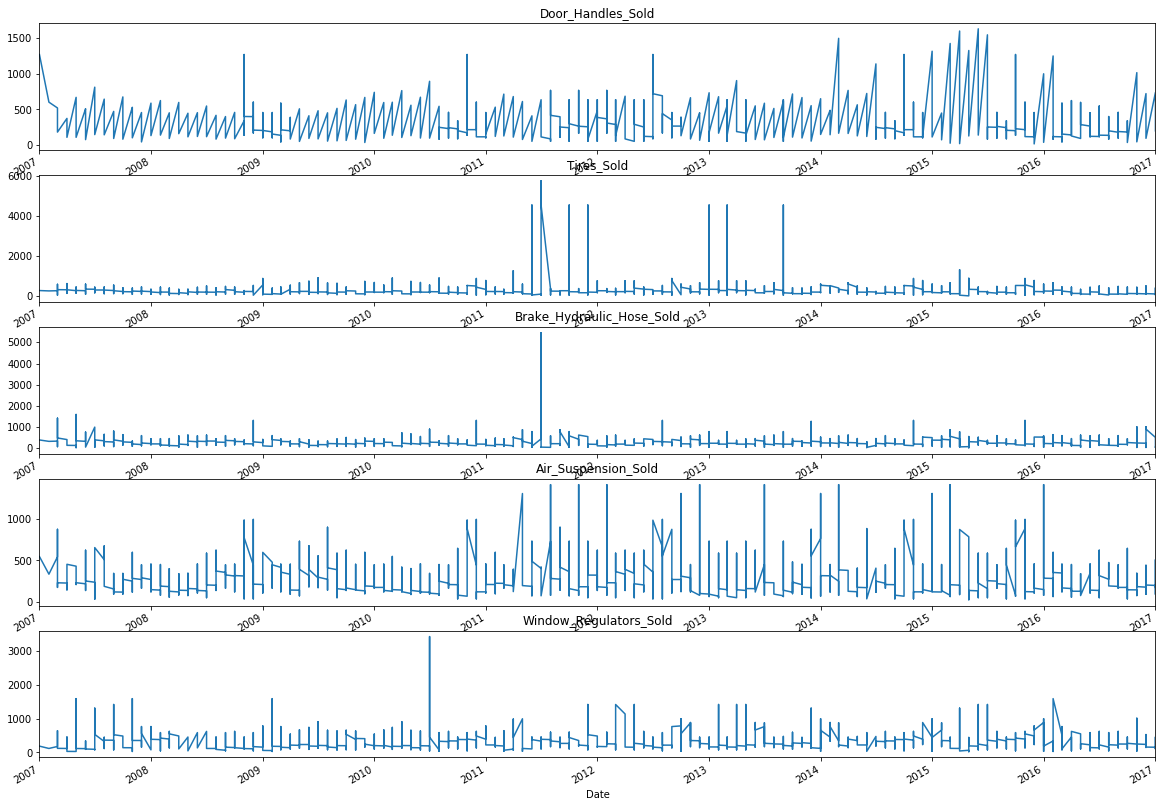

In [78]:
ig,ax = plt.subplots(5,1,figsize=(20,15))
for i,column in enumerate([col for col in df.columns if col != 'Make']):
    df[column].plot(ax=ax[i])
    ax[i].set_title(column)

In [79]:
df['Door_Handles_Sold']=np.log(df.iloc[:,0]).diff(1)

In [80]:
df['Tires_Sold']=np.log(df.iloc[:,1]).diff(1)
df['Brake_Hydraulic_Hose_Sold']=np.log(df.iloc[:,2]).diff(1)
df['Air_Suspension_Sold']=np.log(df.iloc[:,3]).diff(1)
df['Window_Regulators_Sold']=np.log(df.iloc[:,4]).diff(1)


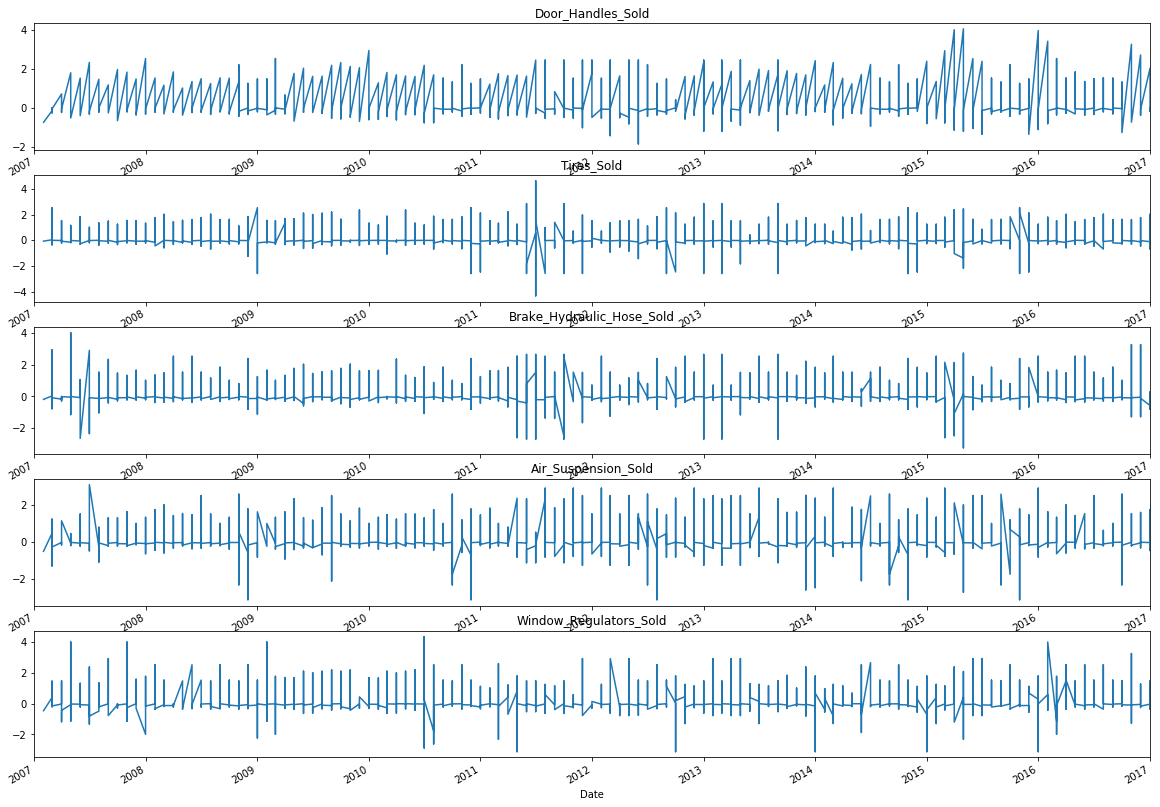

In [50]:
g,ax = plt.subplots(5,1,figsize=(20,15))
for i,column in enumerate([col for col in df.columns if col != 'Make']):
    df[column].plot(ax=ax[i])
    ax[i].set_title(column)

In [ ]:
#data['Make']=le.fit_transform(data[''])

In [14]:
#data['Model']=le.fit_transform(data['Model'])

In [27]:
from sklearn.model_selection import train_test_split

df_train,test_df=train_test_split(df,test_size=0.30,random_state=48)

In [27]:
df.head()

,Door_Handles_Sold,Tires_Sold,Brake_Hydraulic_Hose_Sold,Air_Suspension_Sold,Window_Regulators_Sold
Date,,,,,
2007-01-01,NaN,276,392,NaN,NaN
2007-02-01,-0.744150,258,326,-0.496306,-0.460424
2007-03-01,-0.144507,268,338,0.490807,0.405465
2007-03-01,0.000000,259,321,0.343538,-0.172203
2007-03-01,-0.259298,226,247,-0.804756,1.463752


In [85]:
df=df.dropna()

In [82]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [98]:
train = df[:int(0.8*(len(df)))]
valid = df[int(0.8*(len(df))):]

In [99]:
model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [100]:
cols=df.columns

In [101]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [102]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,5):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Door_Handles_Sold is :  0.47179113092868297
rmse value for Tires_Sold is :  0.4610240797865635
rmse value for Brake_Hydraulic_Hose_Sold is :  0.43158135156372834
rmse value for Air_Suspension_Sold is :  0.5111324980563624
rmse value for Window_Regulators_Sold is :  0.5251340231530494
